<a href="https://colab.research.google.com/github/fernandanlisboa/technologies_clf/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise exploratória sobre o dataset de textos sobre tecnologia.

# Config



*   Davi Costa
*   Fernanda Lisboa
*   João Felipe
*   Maria Antônia





## Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
import matplotlib.pyplot as plt

## Paths

In [ ]:
drive_path = '/content/drive'
directory = f'{drive_path}/MyDrive/2023.2/Tópicos em Inteligência/Dasafio 01 - Classificação/Entrega_Desafio_1'
#directory = f'{drive_path}/MyDrive/'
csv_file = 'base_textos_stack.csv'

In [ ]:
drive.mount(drive_path)

Mounted at /content/drive


# Getting data

In [ ]:
df = pd.read_csv(f"{directory}/{csv_file}")

In [ ]:
df.head(10)

,excerpt,classification
0,Software-defined networking (SDN),1
1,SPDY is an experimental protocol for multiplex...,1
2,ASP.NET SignalR is a library for ASP.NET devel...,0
3,Apache Kafka is a publish-subscribe messaging ...,2
4,Kubernetes is an open source implementation of...,1
5,OWASP Zed Attack Proxy (ZAP):https://www.owasp...,2
6,Apache Camel is a powerful open source integra...,2
7,Graphite is a highly scalable real-time graphi...,2
8,Open Web Interface for .NET that describes how...,0
9,Zipkin is an open source distributed tracing s...,2


# Data instances

In [ ]:
df.shape

(267, 2)

Aqui percebemos que nosso dataset é pequeno, já que possui apenas 267 observações.

In [ ]:
df.isna().sum()

excerpt           0
classification    0
dtype: int64

Além disso, verificamos que não há células vazias, o que já reduzirá um dos passos do pré-processamento desses dados.

Descodificando de nomes de classes de acordo com o respectivo valor.

| Value      | Name                     |
|------------|--------------------------|
| 0          | "Language and Framework" |
| 1          | "Tools"                  |
|  2         | "Platform"               |

In [ ]:
classes_names = { 0: "Language and Framework",
                  1: "Tools",
                  2: "Platform"
                }
data_copy = df.replace({'classification': classes_names})

data_copy.head()

,excerpt,classification
0,Software-defined networking (SDN),Tools
1,SPDY is an experimental protocol for multiplex...,Tools
2,ASP.NET SignalR is a library for ASP.NET devel...,Language and Framework
3,Apache Kafka is a publish-subscribe messaging ...,Platform
4,Kubernetes is an open source implementation of...,Tools


In [ ]:
data_copy['classification'].unique()

array(['Tools', 'Language and Framework', 'Platform'], dtype=object)

Verificando a contagem de observações de cada classe.

In [ ]:
counter = data_copy['classification'].value_counts()
counter

Tools                     89
Language and Framework    89
Platform                  89
Name: classification, dtype: int64

As quantidades de instâncias são iguais! Mas... o conjunto de dados está

*   Item da lista
*   Item da lista

realmente balanceado?

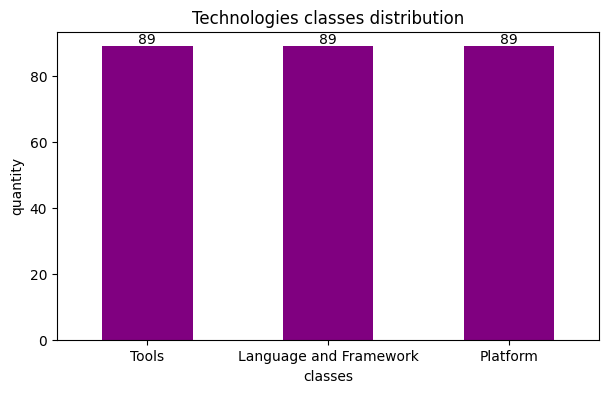

In [ ]:
# visualizing data instances by classes

ax = counter.plot(kind='bar', rot=0, title="Technologies classes distribution", figsize=(7, 4), color='purple')
ax.set_xlabel("classes")
ax.set_ylabel("quantity")
ax.bar_label(ax.containers[0], labels=[f'{p}' for p in counter] )
plt.show()

# Text's length

Verificando se o tamanho dos textos está normalmente distribuído.

Tamanho do texto é a quantidade de palavras em uma instância/documento.

In [ ]:
excerpts = df.copy(deep=True)

excerpts['length'] = [len(sentence.split()) for sentence in excerpts['excerpt']]
excerpts.head()

,excerpt,classification,length
0,Software-defined networking (SDN),1,3
1,SPDY is an experimental protocol for multiplex...,1,19
2,ASP.NET SignalR is a library for ASP.NET devel...,0,45
3,Apache Kafka is a publish-subscribe messaging ...,2,14
4,Kubernetes is an open source implementation of...,1,10


<ipython-input-14-4a2a3fe38aa9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(excerpts['length'])


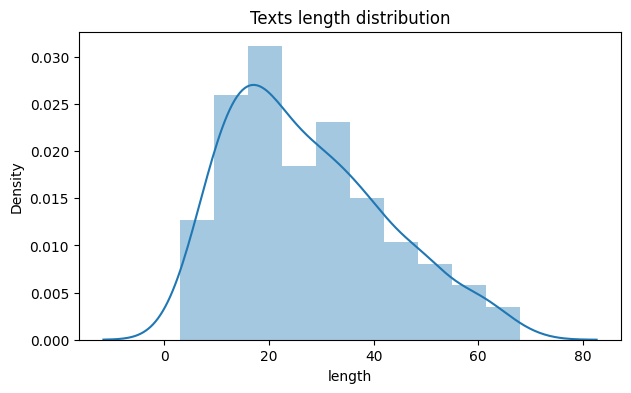

In [ ]:
plt.figure(figsize=(7, 4))

sns.distplot(excerpts['length'])
plt.title('Texts length distribution')

plt.show()

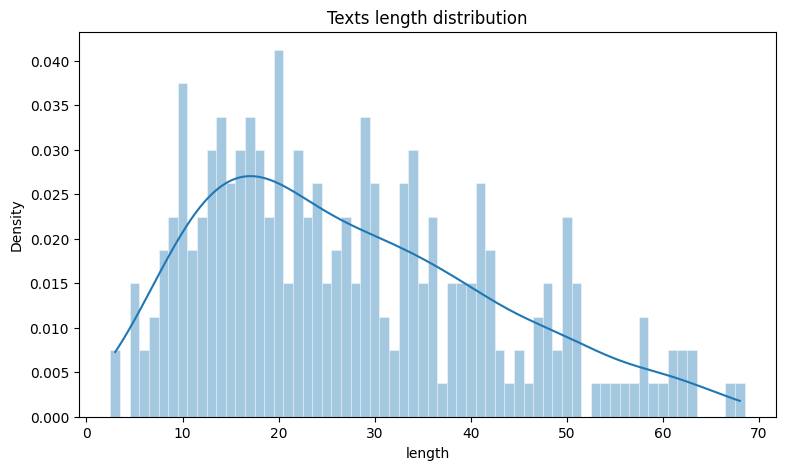

In [ ]:
plt.figure(figsize=(9, 5))

sns.histplot(excerpts, x='length', kde=True, stat="density", discrete=True, alpha=.4, edgecolor=(1, 1, 1, .4))
plt.title('Texts length distribution')

plt.show()

Observando a distribuição geral da quantidade de palavras em cada instância, percebemos que os textos armazenados não são grandes, pois a maior concentração está no intervalo entre 10 e 30 palavras aproximadamente.

Também percebemos que a distribuição desses dados não segue à distribuição normal, sendo unilateral à direita, já que há uma concentração maior dos dados no lado esquerdo e a cauda se alonga à direita, enquanto, praticamente, não há cauda na esquerda.


## Visualizing length's by class

Aqui realizamos a verificação se o comportamento da distribuição dos dados é mantido de acordo com a classe.

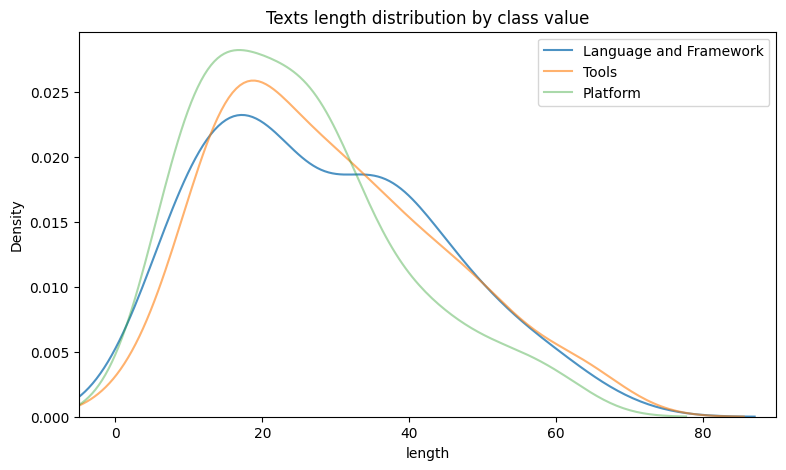

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
excerpts = excerpts.replace({'classification': classes_names})
classes_texts = []
for i in range(3):
  classes_texts.append(excerpts.loc[excerpts['classification'] == classes_names[i]])
alpha = 1
for i in range(3):
  alpha -= 0.2
  sns.kdeplot(classes_texts[i], x='length', alpha=alpha, label=classes_names[i], ax=ax)

ax.set_xlim(-5, 90)
plt.legend()
plt.title('Texts length distribution by class value')

plt.show()

O comportamento dos dados sem observar suas classes é mantido quando os separamos por suas respectivas classes de saída. É interessante observar também que as instâncias pertencentes à classe 'Platform' possui maior concentração entre o intervalo de textos que têm entre 10 a 30 palavras e, com isso, não possui muitos textos com mais de 50 palavras, sobretudo quando comparadas com as quantidades de palavras observações das outras classes.

In [ ]:
excerpts.describe()

,length
count,267.000000
mean,27.374532
std,14.913604
min,3.000000
25%,15.500000
50%,24.000000
75%,37.500000
max,68.000000


Aqui observamos que a média geral é de, aproximadamente, 27 palavras por documento. Confirmando a quantidade pequena de palavras.

# Looking for outliers

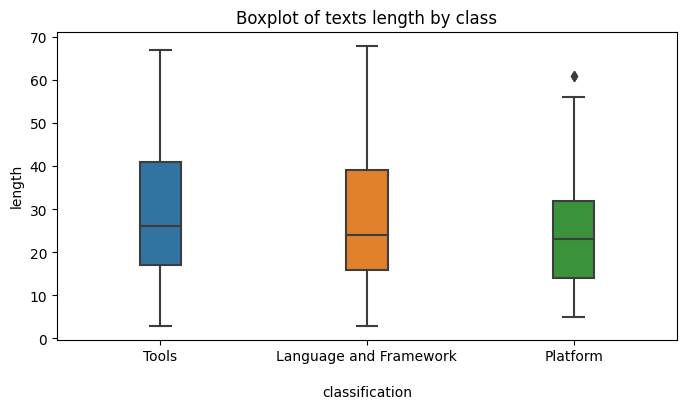

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(excerpts, y='length', x='classification', width=0.2)
plt.title('Boxplot of texts length by class')
plt.xlabel('\nclassification', fontsize=10)
plt.show()

Como o suposto outlier da classe 'Platform' está dentro do intervalo de valores das outras classes, não há necessidade em mexê-lo (retirá-lo ou substituí-lo).

In [ ]:
classes_texts[2].describe()

,length
count,89.000000
mean,24.640449
std,13.671675
min,5.000000
25%,14.000000
50%,23.000000
75%,32.000000
max,61.000000


In [ ]:
classes_texts[2].tail(5)

,excerpt,classification,length
248,Puppet is a ruby-based Configuration Managemen...,Platform,28
252,The Pentaho BI Suite is an open source Busines...,Platform,27
255,Git is an open-source distributed version cont...,Platform,9
258,Chef is an open source systems integration fra...,Platform,36
262,Docker provides a high-level API to containeri...,Platform,20


Observando instâncias com mais palavras do que o intervalo da classe 'Platform'.

In [ ]:
out_instances = classes_texts[2].loc[classes_texts[2]['length'] > 50]
out_instances

,excerpt,classification,length
87,You can get Apigee product related answers and...,Platform,61
146,Packetbeat is the Open Source solution for mon...,Platform,54
186,indexedDB provides a way to store data in the ...,Platform,61
187,"Jaspersoft Studio is the free, open source, ec...",Platform,56
213,Apache Pig is a platform for analyzing large d...,Platform,55


Não há muitas instâncias dessa classe que possuem mais do que 50 palavras.
É interessante verificar se há elementos "especiais" nessas instâncias para tentar descobrir o motivo pelo o qual elas "saíram" do padrão.

In [ ]:
idx = out_instances.index

In [ ]:
for id in idx:
  print(f"{id}:\n{out_instances.loc[id, 'excerpt']}\n\n")

87:
You can get Apigee product related answers and support on the Apigee Community at http://community.apigee.com Apigee is a company that produces and sells an API Management Platform. Products include an API communications gateway, a backend-as-a-service App Services / REST-accessible JSON store. Use this tag for questions about Apigee products; and also indicate the Apigee product such as API Dashboard or Edge.


146:
Packetbeat is the Open Source solution for monitoring Distributed Applications. Think of it like a distributed real-time Wireshark with a lot more analytics features. Packetbeat agents sniff the traffic between your application processes, parse on the fly protocols like HTTP, MySQL, Postgresql, Redis or Thrift and correlate the messages into transactions. Tag:#packetbeat TW:Packetbeat St:ASSESS


186:
indexedDB provides a way to store data in the browser using Javascript. Unlike relational databases, indexedDB uses a key-value store that is conceptually similar to HTML

Observando essas instâncias, descobrimos que há URLs em nosso conjunto de dados, além de nomes de extensões de arquivos, as quais geralmente possuem apenas 3 caractéres maiúsculos.